# Question 1: Exploring Trends in North America

Are there any trends in sentiment, aggression, or stance over time in North America? Are there any trends that coincide with current events? 

### Imports

In [28]:
#Import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
#import hvplot.pandas
from scipy.stats import linregress
import numpy as np
from scipy.optimize import curve_fit

In [29]:
# Import Data
path = os.path.join("..", "Resources", "NA_sample_020.csv")
df = pd.read_csv(path)
df.head()

,Unnamed: 0,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness
0,8037902,2018-01-31 20:40:44+00:00,40.441694,-79.990086,-0.120697,Politics,believer,male,aggressive
1,8790126,2018-03-15 21:28:05+00:00,38.895110,-77.036370,-0.378573,Global stance,believer,male,not aggressive
2,11647260,2018-09-29 14:42:56+00:00,44.000340,-72.749830,-0.216689,Politics,believer,female,not aggressive
3,11810796,2018-10-08 22:23:50+00:00,39.952330,-75.163790,-0.687731,Global stance,believer,female,not aggressive
4,13183104,2018-12-16 11:52:40+00:00,45.421106,-75.690308,0.611834,Weather Extremes,believer,male,not aggressive


### Set Up DataFrame

In [30]:
# Create new df with column with month and date
dates = pd.to_datetime(df["created_at"], infer_datetime_format=True)    #Make variable where the created_at column is converted to datetime
df_month = df.loc[:, ["created_at", "lat", "lng", "sentiment", "topic", "stance", "gender", "aggressiveness"]]  # Make smaller DF with just a few of the columms
df_month["created_at"] = dates  # Change the "created_at" column to the converted date time values
df_month['date'] = df_month['created_at'].dt.to_period('M') # Make a new column where the month and year are extracted from the dates

#Add a column for the year
df_month['year'] = df_month['created_at'].dt.year

df_month.head()

/Users/jennifershulyak/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date,year
0,2018-01-31 20:40:44+00:00,40.441694,-79.990086,-0.120697,Politics,believer,male,aggressive,2018-01,2018
1,2018-03-15 21:28:05+00:00,38.895110,-77.036370,-0.378573,Global stance,believer,male,not aggressive,2018-03,2018
2,2018-09-29 14:42:56+00:00,44.000340,-72.749830,-0.216689,Politics,believer,female,not aggressive,2018-09,2018
3,2018-10-08 22:23:50+00:00,39.952330,-75.163790,-0.687731,Global stance,believer,female,not aggressive,2018-10,2018
4,2018-12-16 11:52:40+00:00,45.421106,-75.690308,0.611834,Weather Extremes,believer,male,not aggressive,2018-12,2018


## Looking at Stance, Aggression, and Sentiment Over Time

In [31]:
#Make Functions to assign numerical value for stance and aggression
def get_agg_factor(x):
    if x == 'aggressive':
        return 100.0
    else:
        return 0.0

def get_st_factor(x):
    if x == 'believer':
        return 100.0
    else:
        return 0.0

df_month["aggressiveness_factor"] = df_month['aggressiveness'].apply(lambda x: get_agg_factor(x))   #Make new column for numerical values for aggression
df_month["stance_factor"] = df_month['stance'].apply(lambda x: get_st_factor(x))    # Make new column for numerical values for stance

df_month.head()

,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date,year,aggressiveness_factor,stance_factor
0,2018-01-31 20:40:44+00:00,40.441694,-79.990086,-0.120697,Politics,believer,male,aggressive,2018-01,2018,100.0,100.0
1,2018-03-15 21:28:05+00:00,38.895110,-77.036370,-0.378573,Global stance,believer,male,not aggressive,2018-03,2018,0.0,100.0
2,2018-09-29 14:42:56+00:00,44.000340,-72.749830,-0.216689,Politics,believer,female,not aggressive,2018-09,2018,0.0,100.0
3,2018-10-08 22:23:50+00:00,39.952330,-75.163790,-0.687731,Global stance,believer,female,not aggressive,2018-10,2018,0.0,100.0
4,2018-12-16 11:52:40+00:00,45.421106,-75.690308,0.611834,Weather Extremes,believer,male,not aggressive,2018-12,2018,0.0,100.0


In [32]:
# Change the type for the factors to be floats
df_month = df_month.astype({
    "aggressiveness_factor": "float64",
    "stance_factor": "float64"
})

# Take the Average Sentiment, aggressiveness, and stance for each month using Groupby
df_averages = df_month.groupby("date")[["aggressiveness_factor", "stance_factor", "sentiment"]].mean() 
# The aggressiveness and stance factors give the percentages of people who are aggressive or believe in climate change

### Plot Sentiment, Aggressiveness, and Stance Over Time

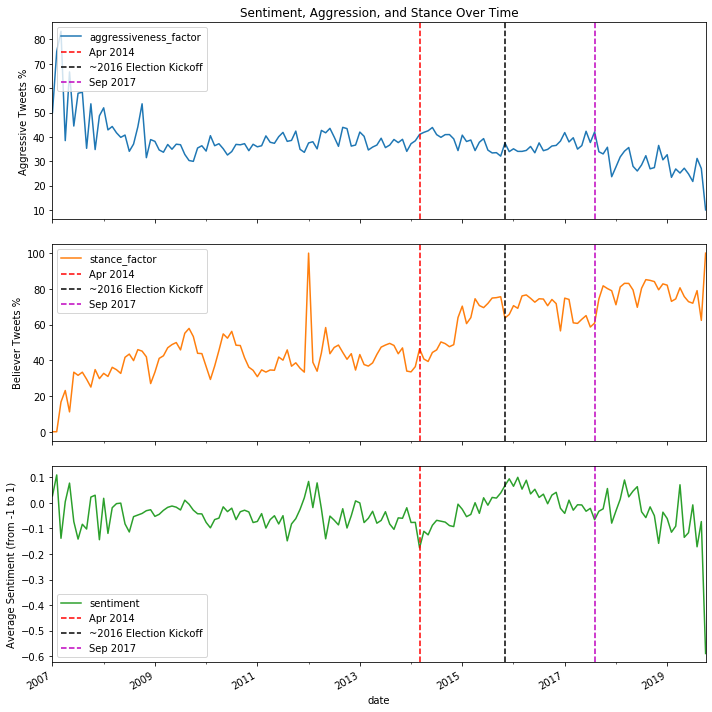

In [33]:
#Plot 
axes = df_averages.plot(subplots=True, figsize=(10, 10))

# For each plot, make a vertical line for dates where it looks like there is a change in the trend
axes[0].set_ylabel("Aggressive Tweets %")
axes[0].axvline(pd.to_datetime("2014-03-01"), color='r', linestyle='--', label = "Apr 2014")
axes[0].axvline(pd.to_datetime("2015-11-01"), color='k', linestyle='--', label = "~2016 Election Kickoff")
axes[0].axvline(pd.to_datetime("2017-08-01"), color='m', linestyle='--', label = "Sep 2017")
axes[0].legend(loc = "upper left")


axes[1].set_ylabel("Believer Tweets %")
axes[1].axvline(pd.to_datetime("2014-03-01"), color='r', linestyle='--', label = "Apr 2014")
axes[1].axvline(pd.to_datetime("2015-11-01"), color='k', linestyle='--', label = "~2016 Election Kickoff")
axes[1].axvline(pd.to_datetime("2017-08-01"), color='m', linestyle='--', label = "Sep 2017")
axes[1].legend(loc = "upper left")

axes[2].set_ylabel("Average Sentiment (from -1 to 1)")
axes[2].axvline(pd.to_datetime("2014-03-01"), color='r', linestyle='--', label = "Apr 2014")
axes[2].axvline(pd.to_datetime("2015-11-01"), color='k', linestyle='--', label = "~2016 Election Kickoff")
axes[2].axvline(pd.to_datetime("2017-08-01"), color='m', linestyle='--', label = "Sep 2017")
axes[2].legend(loc = "best")

axes[0].set_title("Sentiment, Aggression, and Stance Over Time")

plt.tight_layout()

# Save plot
plt.savefig("../Images/Q1_Trends.png", transparent = False, facecolor= "white")


## Analysis

The percent of aggressive tweets is  gradually decreasing over time. The percentage of tweets that support the belief of climate change is increasing overall. The average sentiment for each month fluctuates and contains smaller trends.

Before early 2014, there is higher variability in the data and any trends present. Starting in early 2014, some clear and more steady and positive trends appear in the percentage of tweets that support climate change and that have positive sentiment. Separate research shows that in 2014, the world experienced many climate related natural disaster starting with wildfires in early 2014 in Australia and heat waves in Canada and Alaska. 

Starting in late 2015, the sentiment switches from steadily increasing, to steadily decreasing. The percentage of tweets supporting climate change stops increasing and begins to decrease. The percent of aggressive tweets stops decreasing, and increases slight. These trends end in mid 2017. The start of these trends coincides with the ramping up of the 2016 election cycle which had climate change as a major devicisve talking point/issue. The trend ends in mid-late 2017. A notible climate change event that may have had an import was the US leaving the Paris Climate Agreement in June 2017.

A large jump in the average sentiment and the percent of tweet that believe in climate change occurs in the Fall of 2017, after which the data becomes more variable. The percentage of aggressive tweets begins to decrease again. 

## Comparing the Number of Tweets that Support, are Neutral on, or Deny Climate Change

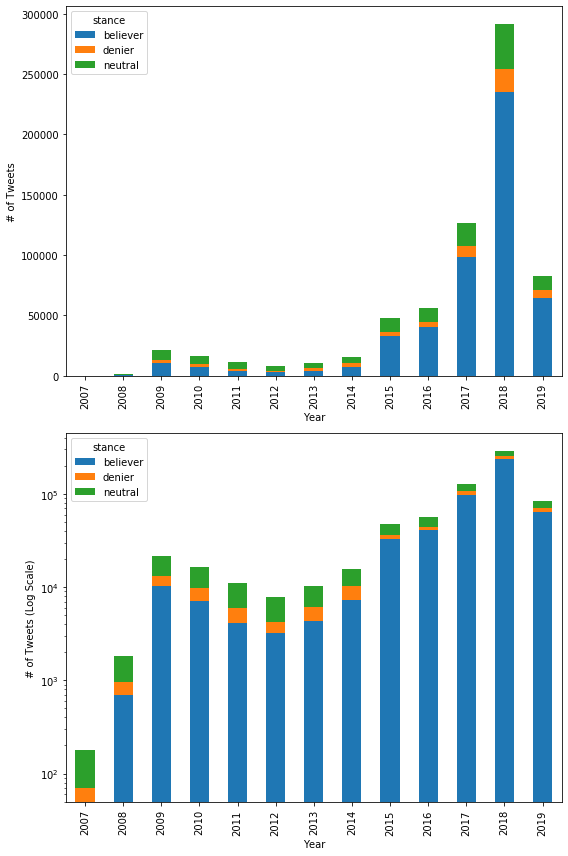

In [34]:
# Create a df where the data is grouped by the year and the stance of the tweet. Count the number of tweets in each category
stance_df = df_month.groupby(["year", "stance"])["gender"].count()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

stance_df.unstack().plot(kind='bar', stacked=True, ax=axes[0]) # make one plot have a linear y axis
stance_df.unstack().plot(kind = "bar", stacked = True, ax=axes[1], logy= True)  # make a plot with a logarithmic y axis

axes[0].set_xlabel("Year")
axes[0].set_ylabel("# of Tweets")

axes[1].set_xlabel("Year")
axes[1].set_ylabel("# of Tweets (Log Scale)")



plt.tight_layout()

# Save plot
plt.savefig("../Images/Q1_StanceNumbers.png", transparent = False, facecolor= "white")


### Analysis:

The number of tweets about climate change decreases from 2019 to 2012. After 2012 there is a rapid increase in the number of tweets per year about climate change. The increase appears exponential. The increase in the number of tweets could be due to an increase in the numner of consumers joining Twitter or the increased politcal attention to climate change starting in 2015/2016 in the 2016 election cycle. A rapid increase could also be related to Greta Thunberg entering the international stage in 2018 and garnering a large Twitter following. 

The second graph was made with the same data but uses a logarithmic scale to better examine how the number of believer, neutral, and deniers tweets changed over time. It is clear that the changes are explonential. It is less clear how the number of believer tweets is changing compared to the number of denier tweets. 

## Taking a Closer Look at Stance Over Time

### Exponential Regression for Believers

In [35]:
# Make a data frame with just stance
series_stance = df_averages["stance_factor"]
df_stance = series_stance.to_frame()    # Convert the series back into a dataframe
df_stance.reset_index(inplace=True) # Reset the index so that Date is a column

def change_timestamp(x):    #Made function to change period to timestamp
    return x.to_timestamp()

df_stance["date"] = df_stance['date'].apply(lambda x: change_timestamp(x))      #Change all date column to timestamp

In [37]:
# Just look at the time after 2012 and before 2019
# Make a new dataframe looking at just after 2012 and cutting off the outlier of October 2019
df_2012 = df_stance.loc[(df_stance["date"] >= (pd.to_datetime("2012-02-01"))) & (df_stance["date"] <= (pd.to_datetime("2019-09-01"))), :]

In [38]:
x_values = [x for x in range(len(df_2012))] # Make a list of integers to represent the number of months since February 2012 to make it easier to conduct exponential regressions
y = list(df_2012["stance_factor"])  # Make the dependent variable the stances (the percent of believer tweets)
y_values = [y for y in y]   # Make the y values just a list 
len(y_values)

92

In [39]:
# Define the function that the data will be fit to
def func_exp(x, a, b, c):
        return a * np.exp(b * x) + c

# Conver the variables into arrays
x_data = np.array(x_values) 
y_data = np.array(y_values)

# Regression! 
popt, pcov = curve_fit(func_exp, x_data, y_data, p0 = (-1, 0.01, 1))

# Write the equation for Believers! 
expo_eq = "y = " + str(round(popt[0],2)) + "e^("+ str(round(popt[1],5)) + "x) + " + str(round(popt[2],2))  


### Exponential Regression for Deniers

In [40]:
# CMake function to assign numerical value for stance where being denier is 100
df_deniers = df_month.copy()

def get_denier_factor(x):
    if x == 'denier':
        return 100.0
    else:
        return 0.0

df_deniers["denier_factor"] = df_deniers['stance'].apply(lambda x: get_denier_factor(x))    # make column with numerical value for stance

df_deniers.head()

,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date,year,aggressiveness_factor,stance_factor,denier_factor
0,2018-01-31 20:40:44+00:00,40.441694,-79.990086,-0.120697,Politics,believer,male,aggressive,2018-01,2018,100.0,100.0,0.0
1,2018-03-15 21:28:05+00:00,38.895110,-77.036370,-0.378573,Global stance,believer,male,not aggressive,2018-03,2018,0.0,100.0,0.0
2,2018-09-29 14:42:56+00:00,44.000340,-72.749830,-0.216689,Politics,believer,female,not aggressive,2018-09,2018,0.0,100.0,0.0
3,2018-10-08 22:23:50+00:00,39.952330,-75.163790,-0.687731,Global stance,believer,female,not aggressive,2018-10,2018,0.0,100.0,0.0
4,2018-12-16 11:52:40+00:00,45.421106,-75.690308,0.611834,Weather Extremes,believer,male,not aggressive,2018-12,2018,0.0,100.0,0.0


In [41]:
# Make a df of the average percentage of denier tweets for each month
df_avdeniers = df_deniers.groupby("date")["denier_factor"].mean() 

# Make sure that there is a date column converted to datetime
df_den = df_avdeniers.to_frame()
df_den.reset_index(inplace=True)
df_den["date"] = df_den['date'].apply(lambda x: change_timestamp(x))  

# Make a new dataframe looking at just after 2012 and cutting off the outlier of October 2019
df_2012_den = df_den.loc[(df_den["date"] >= (pd.to_datetime("2012-02-01"))) & (df_den["date"] <= (pd.to_datetime("2019-09-01"))), :]

In [42]:
# Define x and y axis variables.
x_values_2 = [x for x in range(len(df_2012_den))]   # Make a list of integers instead of time so it is easier to perform regression
y_2 = list(df_2012_den["denier_factor"])
y_values_2 = [y for y in y_2]

In [43]:
# Define the function that the data will be fit to
def func_exp(x, a, b, c):
        return a * np.exp(b * x) + c

# Put variables into arrrays 
x_data_2 = np.array(x_values_2) 
y_data_2 = np.array(y_values_2)

#Regression! 
popt_2, pcov_2 = curve_fit(func_exp, x_data_2, y_data_2, p0 = (-1, 0.001, 1))

# Make equation for denier regression
expo_eq_2 = "y = " + str(round(popt_2[0],2)) + "e^("+ str(round(popt_2[1],5)) + "x) + " + str(round(popt_2[2],2))  
print(popt_2)

[ 2.56179739e+01 -5.62966223e-03 -8.41136544e+00]


### Plot Both Regressions Together

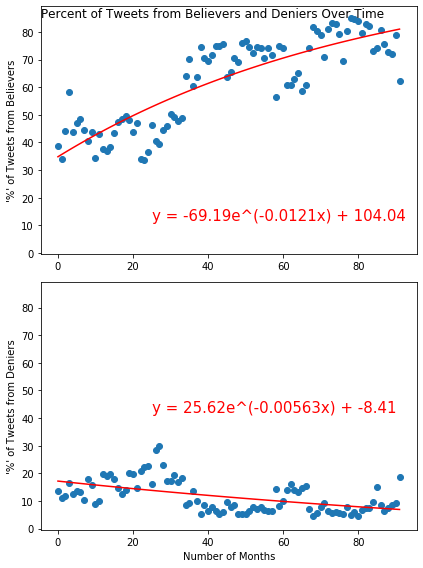

In [44]:
# Plot using subplots 
regression_stance, axs = plt.subplots(2, 1, figsize=(6, 8), sharey=True)

axs[0].scatter(x_data, y_data)
axs[0].plot(x_data, func_exp(x_data, *popt), color = "red")
axs[0].annotate(expo_eq,(25, 12),fontsize=15,color="red") # Graphing the  equation on the plot 
axs[0].set_ylabel("'%' of Tweets from Believers")

axs[1].scatter(x_data_2, y_data_2)
axs[1].plot(x_data_2, func_exp(x_data_2, *popt_2), color = "red")
axs[1].set_ylabel("'%' of Tweets from Deniers")
axs[1].set_xlabel("Number of Months")
axs[1].annotate(expo_eq_2,(25,42),fontsize=15,color="red") # Graphing the  equation on the plot 



regression_stance.suptitle('Percent of Tweets from Believers and Deniers Over Time')
regression_stance.tight_layout()


plt.tight_layout()

# Save plot
plt.savefig("../Images/Q1_Stance_Regression.png", transparent = False, facecolor= "white")

## Analysis:

There is growth in the percentage of believer tweets, but the rate is slowing down. There is a decrease in the percentage of tweets that deny climate change.

If these trends continue, the percent of tweets from believers will reach 100% in 12-15 years, and the percent of denier tweets will reach 0% in 7-8 years. The descrepancy in time could be the neutral tweets. However, are these results due to deniers changing their minds or are deniers leaving Twitter? Or are the number of people joining Twitter who believe in climate change and are active dwarf the number of deniers joning/being active on Twitter? 